# Two-sample Kolmogorov–Smirnov test

This notebook applies a KS test to ages of zircon wihtin garnet and zircon within the matrix to test if they are derived from the same distribution.

## Import Python modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style='ticks', font='Arial', context = 'paper')

## Import zircon data from weighted averages

In [2]:
# Import U-Pb data
upb = pd.read_csv('../data/zircon-ages.csv')
upb = upb[upb.Age_Status == 'Include']

# Subset U-Pb data by zircon population
zm = upb[upb.Population == 'Matrix']
zg = upb[upb.Population == 'Garnet']

## Perform two sample KS test

The null hypothesis (that the samples come from the same distribution) is rejected if:

1. the p-value is small
2. the D statistic exceeds the critical values defined by:

$$ D_{n,m} > c(\alpha)\sqrt{\frac{n+m}{nm}} $$

Variables n and m are sample sizes and c(a) is 1.36 for condfidence lelvel of 0.05 and 1.63 for condfidence lelvel of 0.01.  

In [3]:
from scipy import stats
ks = stats.ks_2samp(zm.Age, zg.Age)

m = zm.Age.count()
n = zg.Age.count()

# critical values for KS statistic
# if D is greater than s, then sample not drawn from same distribution
s95 = 1.36 * np.sqrt((n + m) / (n * m))
s99 = 1.63 * np.sqrt((n + m) / (n * m))
print(ks, s95, s99)

Ks_2sampResult(statistic=0.78947368421052633, pvalue=5.8850217885361679e-06) 0.447328653203 0.536136547589


The samples are not from the same distribution

* the D statistoc is high 0.79
* the p-value is low 5.9E-6 and less than 0.05 (or 0.01)
* the D statistic is greater than the critival values at 0.05 (0.45) and 0.01 (0.54)

## Plot results of the KS test

13.0 16.0


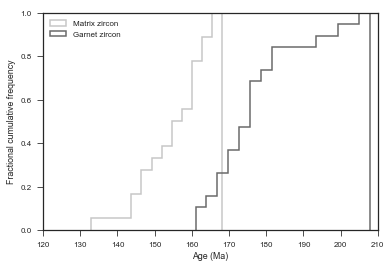

In [4]:
# Set plotting style with Seaborn
sns.set_palette('Greys', n_colors=2)

# scott bin-width
m_bins = np.round(3.5 * zm.Age.std() / (zm.Age.count()**0.3333))
g_bins = np.round(3.5 * zg.Age.std() / (zg.Age.count()**0.3333))
print(m_bins, g_bins)

#n_bins = 50.

# plot the cumulative histogram for zircon in the matrix
plt.hist(zm.Age, 13, normed=1, histtype='step',cumulative=True, label='Matrix zircon', lw=1.5)

# plot the cumulative histogram for zircon in garnet
plt.hist(zg.Age, 16, normed=1, histtype='step', cumulative=True, label='Garnet zircon', lw=1.5)

plt.xlim(120., 210.)
plt.ylim(0.0, 1.0)
plt.xlabel('Age (Ma)')
plt.ylabel('Fractional cumulative frequency')
plt.legend(loc=2)
plt.savefig('../figs/supplement-ks-test.png')